# Ridge Regression

Ridge regression uses the same least-squares criterion, but with one difference. During the training phase, it adds a penalty for feature weights. The large weights means mathematically that the sum of their squared values is large. The addition of the penalty term is called **_regularization_**. It's a way to avoid over-fitting and **improve the likely generalization** of the model. The effect of this restriction from regularisation, is to **reduce the complexity** of the final estimated model.
\begin{equation}
RSS_{RIDGE} (w,b) = \sum_{i=1}^{N} (y_i - (w . x_i + b))^2 + \alpha \sum_{j=1}^p w_j^2
\end{equation}

The amount of regularization is determined by the alpha paramter. Larger alpha means more regularization and simpler linear models with weights closer to zero. setting $\alpha$ = 0 means ordinary least squares regression

The practical effect of using ridge regression, is to find the feature weights that fit the data well in at least square sense, and that set lots of the feature weights two values that are very small. We don't see this effect with a single variable linear regression example, but for regression problems with dozens or hundreds of features, the accuracy improvement from using regularized linear regression like ridge regression could be significant.

### 1. Import Libraries

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap

### 2. Load Crime data

In [3]:
# Communities and Crime dataset
from adspy_shared_utilities import load_crime_dataset
(X_crime, y_crime) = load_crime_dataset()
X_crime.head()

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85
0,11980,3.10,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,...,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14
1,23123,2.82,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,...,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12
2,29344,2.43,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,...,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85
3,16656,2.40,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,...,28.7,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24
5,140494,2.45,18.09,32.89,20.04,13.26,140494,100.0,21577,75.78,...,26.4,17.3,11.7,327,4,1.49,64.35,42.29,70.61,85.66


In [4]:
# Variables in dataset
X_crime.columns

Index(['population', 'householdsize', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'NumUnderPov', 'PctPopUnderPov',
       'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
       'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu',
       'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par',
       'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom',
       'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'NumImmig',
       'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10',
       'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10',
       'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam',
       'PctLargHouseOccup', 'PersPerOccupHous', 'Pe

### 3. Test train split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)
print ('Training Set Dimensions : ', X_train.shape)
print ('Test Set Dimensions : ', X_test.shape)

Training Set Dimensions :  (1495, 88)
Test Set Dimensions :  (499, 88)


### 4. Ridge Regression

In [6]:
from sklearn.linear_model import Ridge
linridge = Ridge(alpha = 20).fit(X_train, y_train)
linridge

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [7]:
print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))

Crime dataset
ridge regression linear model intercept: -3352.4230358464793
ridge regression linear model coeff:
[  1.95091438e-03   2.19322667e+01   9.56286607e+00  -3.59178973e+01
   6.36465325e+00  -1.96885471e+01  -2.80715856e-03   1.66254486e+00
  -6.61426604e-03  -6.95450680e+00   1.71944731e+01  -5.62819154e+00
   8.83525114e+00   6.79085746e-01  -7.33614221e+00   6.70389803e-03
   9.78505502e-04   5.01202169e-03  -4.89870524e+00  -1.79270062e+01
   9.17572382e+00  -1.24454193e+00   1.21845360e+00   1.03233089e+01
  -3.78037278e+00  -3.73428973e+00   4.74595305e+00   8.42696855e+00
   3.09250005e+01   1.18644167e+01  -2.05183675e+00  -3.82210450e+01
   1.85081589e+01   1.52510829e+00  -2.20086608e+01   2.46283912e+00
   3.29328703e-01   4.02228467e+00  -1.12903533e+01  -4.69567413e-03
   4.27046505e+01  -1.22507167e-03   1.40795790e+00   9.35041855e-01
  -3.00464253e+00   1.12390514e+00  -1.82487653e+01  -1.54653407e+01
   2.41917002e+01  -1.32497562e+01  -4.20113118e-01  -3.5971

### 5. Accuracy

In [8]:
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

R-squared score (training): 0.671
R-squared score (test): 0.494
Number of non-zero features: 88


### Comparing with Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print('R-squared score (training): {:.3f}'
     .format(reg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(reg.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(reg.coef_ != 0)))

R-squared score (training): 0.668
R-squared score (test): 0.520
Number of non-zero features: 88


You'll notice here that the results are not that impressive. The R-squared score on the test set is pretty comparable to what we got for least-squares regression. 

#### The need for feature preprocessing and normalization. 
Ridge regression is regularizing the linear regression by imposing that sum of squares penalty on the size of the $w$ coefficients. So the effect of increasing alpha is to shrink the $w$ coefficients toward zero and towards each other. But if the input variables, the features, have very different scales, then when this shrinkage happens of the coefficients, input variables with different scales will have different contributions to this L2 penalty, because the L2 penalty is a sum of squares of all the coefficients. So transforming the input features, so they're all on the same scale, means the ridge penalty is in some sense applied more fairly to all features without unduly weighting some more than others, just because of the difference in scales.

### 6. MinMax Scaler

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = Ridge().fit(X_train_scaled,y_train)
r2_score = clf.score(X_test_scaled, y_test)
r2_score

0.56027008048140647

In [15]:
# Alternatively fitting and transforming simultaenously
X_train_scaled = scaler.fit_transform(X_train)

### 7. Ridge Regression with Normalization and Feature Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 933.3906385044113
ridge regression linear model coeff:
[  88.68827454   16.48947987  -50.30285445  -82.90507574  -65.89507244
   -2.27674244   87.74108514  150.94862182   18.8802613   -31.05554992
  -43.13536109 -189.44266328   -4.52658099  107.97866804  -76.53358414
    2.86032762   34.95230077   90.13523036   52.46428263  -62.10898424
  115.01780357    2.66942023    6.94331369   -5.66646499 -101.55269144
  -36.9087526    -8.7053343    29.11999068  171.25963057   99.36919476
   75.06611841  123.63522539   95.24316483 -330.61044265 -442.30179004
 -284.49744001 -258.37150609   17.66431072 -101.70717151  110.64762887
  523.13611718   24.8208959     4.86533322  -30.46775619   -3.51753937
   50.57947231   10.84840601   18.27680946   44.11189865   58.33588176
   67.08698975  -57.93524659  116.1446052    53.81163718   49.01607711
   -7.62262031   55.14288543  -52.08878272  123.39291017   77.12562171
   45.49795317  184.91229771  -91.3572

In [28]:
print('Ridge regression: effect of alpha regularization parameter\n')
train_score = []
test_score = []
alpha = [0, 1, 10, 20, 50, 100, 1000]
for this_alpha in alpha:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    train_score = np.append(train_score, r2_train)
    test_score = np.append(test_score,r2_test) 
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 88, r-squared training: 0.76, r-squared test: -206141049280650934784884736.00

Alpha = 1.00
num abs(coeff) > 1.0: 88, r-squared training: 0.74, r-squared test: -0.20

Alpha = 10.00
num abs(coeff) > 1.0: 87, r-squared training: 0.67, r-squared test: 0.33

Alpha = 20.00
num abs(coeff) > 1.0: 87, r-squared training: 0.64, r-squared test: 0.40

Alpha = 50.00
num abs(coeff) > 1.0: 87, r-squared training: 0.57, r-squared test: 0.45

Alpha = 100.00
num abs(coeff) > 1.0: 87, r-squared training: 0.50, r-squared test: 0.43

Alpha = 1000.00
num abs(coeff) > 1.0: 80, r-squared training: 0.15, r-squared test: 0.15



In [31]:
test_score

array([ -2.06141049e+26,  -1.95295379e-01,   3.29012357e-01,
         4.04418742e-01,   4.49872705e-01,   4.32350373e-01,
         1.45284435e-01])

<IPython.core.display.Javascript object>


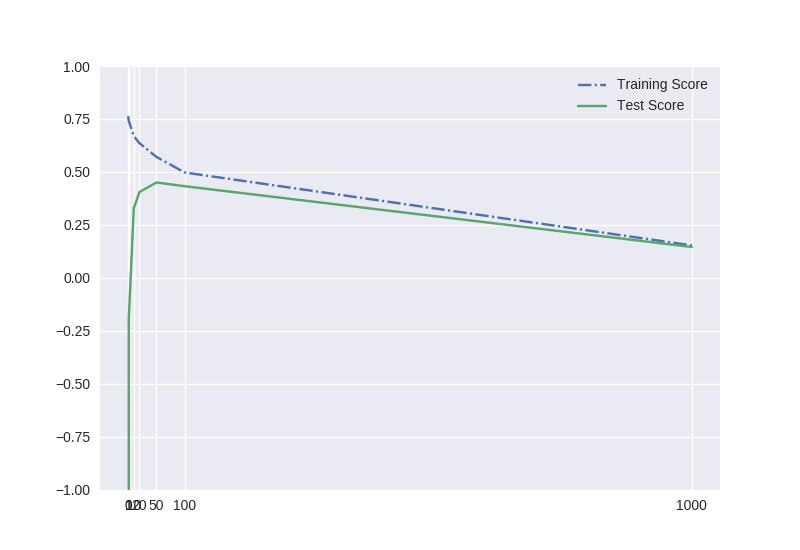

([<matplotlib.axis.XTick at 0x7f9989d64198>,
 <a list of 7 Text xticklabel objects>)

In [40]:
fig = plt.figure()
plt.plot(alpha, train_score, '-.', alpha, test_score, '-')
plt.ylim(-1, 1)
plt.legend(labels = ['Training Score','Test Score'])
plt.xticks(alpha)